In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/surface.csv')
df = df.drop('dE', axis=1)  
print(df.shape)
print(df.head())

(40, 71)
   v\T           100           200           300           400           500  \
0    1  4.670000e-17  1.850000e-16  5.200000e-16  1.220000e-15  2.640000e-15   
1    2  1.050000e-16  4.160000e-16  1.170000e-15  2.720000e-15  5.890000e-15   
2    3  1.790000e-16  7.010000e-16  1.960000e-15  4.560000e-15  9.850000e-15   
3    4  2.710000e-16  1.050000e-15  2.930000e-15  6.790000e-15  1.460000e-14   
4    5  3.850000e-16  1.470000e-15  4.110000e-15  9.490000e-15  2.040000e-14   

            600           700           800           900  ...          6100  \
0  5.420000e-15  1.030000e-14  1.780000e-14  2.860000e-14  ...  9.680000e-12   
1  1.200000e-14  2.270000e-14  3.930000e-14  6.260000e-14  ...  1.900000e-11   
2  2.000000e-14  3.760000e-14  6.480000e-14  1.030000e-13  ...  2.800000e-11   
3  2.970000e-14  5.550000e-14  9.520000e-14  1.510000e-13  ...  3.680000e-11   
4  4.120000e-14  7.670000e-14  1.310000e-13  2.060000e-13  ...  4.530000e-11   

           6200          6300

In [2]:
v = df['v\T']
T = df.columns[1:]
T = [int(t) for t in T]
v = [int(v) for v in v]
print(v)
print(T)

x, y = np.meshgrid(T, v)
print(x.shape)
print(y.shape)
z = np.array(df.iloc[:,1:])
print(z.shape)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000]
(40, 70)
(40, 70)
(40, 70)


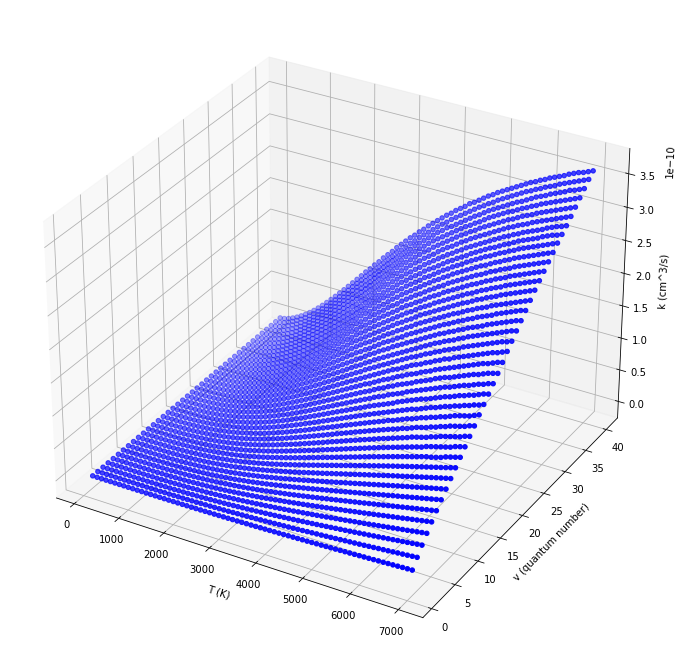

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
fig.set_size_inches(12, 12)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='b')
ax.set_xlabel('T (K)')
ax.set_ylabel('v (quantum number)')
ax.set_zlabel('k (cm^3/s)')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

t = x.reshape(-1)
v = y.reshape(-1)
X = np.column_stack((t, v)) 
Y = z.reshape(-1)
print(X.shape, X[0])
print(Y.shape, Y[0]) 
X_train, X_test, Y_train, Y_test = train_test_split(\
    X, Y, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2800, 2) [100   1]
(2800,) 4.67e-17
(2520, 2) (280, 2) (2520,) (280,)


/home/redo/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/home/redo/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


RMSE 3.41e-11, R2   0.86


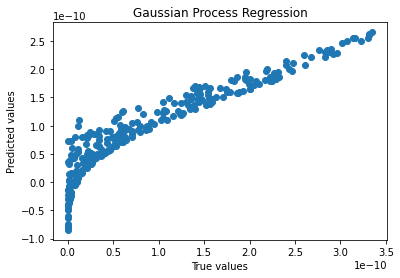

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.metrics import mean_squared_error, r2_score

kernel = 1.0 * Matern(length_scale=1.0, nu=2.5)
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10,\
                               normalize_y=False, random_state=42)
gpr.fit(X_train, Y_train)
Y_pred, Y_std = gpr.predict(X_test, return_std=True)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)
print("RMSE %6.2e, R2 %6.2f" % (rmse, r2))
plt.scatter(Y_test, Y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Gaussian Process Regression')
plt.show()

In [6]:
print(np.min(Y_test), np.max(Y_test))
print(np.min(Y_pred), np.max(Y_pred))

1.05e-16 3.35e-10
-8.452855806257396e-11 2.655611032996181e-10


/home/redo/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RMSE 6.02e-13, R2   1.00


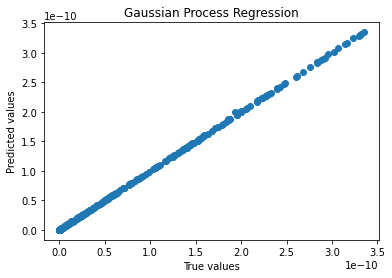

In [7]:
# use the logaritmic base 10 scakle for Y 
Y_trainL = np.log10(Y_train)
kernel = 1.0 * Matern(length_scale=1.0, nu=2.5)
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10,\
                               normalize_y=False, random_state=42)
gpr.fit(X_train, Y_trainL)
Y_predL = gpr.predict(X_test)
Y_pred = 10**Y_predL
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)
print("RMSE %6.2e, R2 %6.2f" % (rmse, r2))
plt.scatter(Y_test, Y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Gaussian Process Regression')
plt.show()

In [8]:
print(np.min(Y_test), np.max(Y_test))
print(np.min(Y_pred), np.max(Y_pred))

1.05e-16 3.35e-10
1.0112154496134055e-16 3.348786030775483e-10
